In [54]:
def calculate_global_AR(file, column='amplitudes'):
    transients_amplitudes = []
    for i in range(0,len(file)-1):
        transient1 = float(file[column][i])
        transient2 = float(file[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

def calculate_local_AR(file, column='amplitudes'):
    transients_amplitudes = []
    for i in range(0,len(slice_df)-1):
        transient1 = float(slice_df[column][i])
        transient2 = float(slice_df[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

In [45]:
def calculate_alternance_ratio(transients):
    '''Alternance Ratio (AR) was calculated as the difference in the magnitude of the two consecutive local transients / the amplitude of the largest transient.
'file' parameter corresponds to CardIAP output table, 
'column' parameter refers to amplitud column, 
'peaks' parameter is a tuple of two consecutives integers.'''
    AR_list = []
    for transient_tuple in transients:
        AR = (abs(transient_tuple[0]-transient_tuple[1]))/max(transient_tuple[0], transient_tuple[1])
        AR_list.append(AR)
    return AR_list

In [17]:
'''The discordance index (DI) is defined as the standard deviation of the measured local AR values'''


def discordance_index(local_AR_df):
    return local_AR_df.std()

In [52]:
import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/complete_cell (2).csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
transients_amplitudes = calculate_global_AR(file)
calculate_alternance_ratio(transients_amplitudes)

[0.09999999105930354,
 0.15151510783791775,
 0.0,
 0.14880954648648925,
 0.20555554228248427,
 0.0666666262077554,
 0.07142860161793664,
 0.1538461446762085,
 0.2857142686843872]

In [55]:
import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/slices (1).csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
local_AR = []
for slice_ in range(max(file['slice_number'])):
    slice_df = file[file['slice_number']== slice_].reset_index(drop=True)
    transients_amplitudes = calculate_local_AR(file)
    AR = calculate_alternance_ratio(transients_amplitudes)
    local_AR.append(AR)
local_AR_df = pd.DataFrame(local_AR)

In [56]:
local_AR_df

,0,1,2,3,4,5,6,7,8
0,0.282051,0.187500,0.541667,0.796296,0.933333,0.880000,0.733333,0.466667,0.333333
1,0.076923,0.692308,0.285714,0.860000,0.675000,0.230769,0.736842,0.321429,0.797619
2,NaN,NaN,0.500000,0.511111,0.450000,0.200000,0.266667,NaN,NaN
3,0.055556,NaN,NaN,0.600000,0.545455,0.363636,0.533333,0.400000,NaN
4,0.200000,0.550000,0.788235,0.901961,0.895833,0.111111,0.142857,0.300000,0.622222
5,0.590909,0.636364,0.750000,0.812500,0.571429,0.650000,0.400000,0.750000,NaN
6,0.333333,0.266667,0.363636,0.142857,0.555556,NaN,NaN,NaN,NaN
7,0.043478,0.250000,0.272727,0.296875,0.464286,0.928571,0.884615,0.666667,0.884615
8,0.746667,NaN,NaN,0.613333,0.579710,0.797101,0.142857,0.250000,0.423077
9,NaN,NaN,0.550000,0.512500,0.307692,0.750000,0.333333,0.962963,0.933333


In [35]:
discordance_index(local_AR_df)

0    0.292786
1    0.278624
2    0.273427
3    0.273743
4    0.246068
5    0.248004
6    0.269265
7    0.262836
8    0.278912
dtype: float64

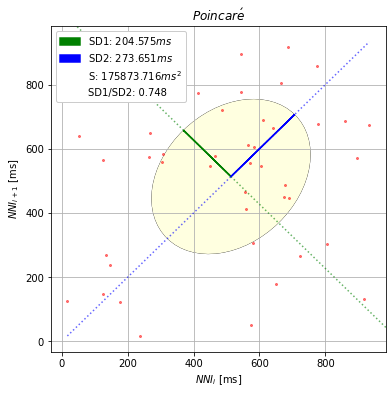

ReturnTuple(poincare_plot=<Figure size 432x432 with 1 Axes>, sd1=204.57535244973175, sd2=273.65145333769414, sd_ratio=1.3376560277706757, ellipse_area=175873.71597568336)


In [58]:
from django.contrib.admin.utils import flatten
import pyhrv
import pyhrv.nonlinear as nl

# Estructuración de datos para Poincaré

min_c5 = [local_AR_df[4].dropna().tolist()]
min_c5 = flatten(min_c5)

# min_vk5 = [l.tolist() for l in tabulado_vk5['mins']]
# min_vk5 = flatten(min_vk5)

# min_dan5 = [l.tolist() for l in tabulado_dan5['mins']]
# min_dan5 = flatten(min_dan5)

# Load sample data
nni = min_c5

# Compute Poincaré using NNI series
results = nl.poincare(nni)

# Print SD1
print(results)

# results[0].savefig("c5.png")

/home/leandro/.local/lib/python3.8/site-packages/pyhrv/nonlinear.py:286: UserWarning: Not enough NNI samples for Detrended Fluctuations Analysis.
  warnings.warn("Not enough NNI samples for Detrended Fluctuations Analysis.")


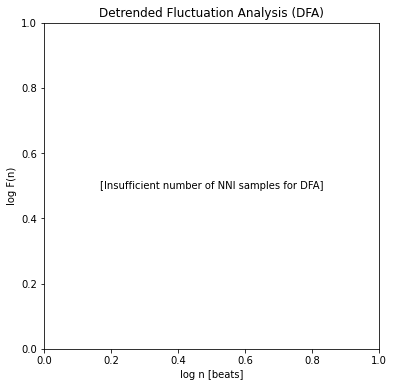

ReturnTuple(dfa_plot=<Figure size 432x432 with 1 Axes>, dfa_alpha1='nan', dfa_alpha2='nan', dfa_alpha1_beats=range(4, 17), dfa_alpha2_beats=range(17, 65))

In [61]:
pyhrv.nonlinear.dfa(nni, rpeaks=None, short=None, long=None, show=True, figsize=None, legend=False)